In [11]:
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from model.neighbors import neighbors

In [12]:
ad_data = ad.read_h5ad("../data/bifurcation.h5ad")
sc.pp.scale(ad_data)
sc.pp.pca(ad_data)

Text(0.5, 1.0, 'Dim reduction of bifurcation data')

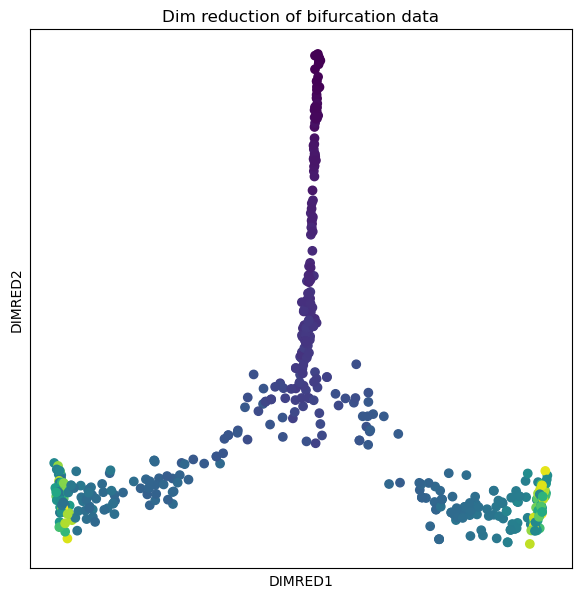

In [17]:
ad_data.obs['dim1'] = ad_data.obsm['dimred'][:,0]
ad_data.obs['dim2'] = ad_data.obsm['dimred'][:,1]
ad_data.obs['dim3'] = ad_data.obsm['dimred'][:,2]
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(ad_data.obs['dim1'],ad_data.obs['dim2'],c=ad_data.obs['sim_time'],cmap=plt.cm.viridis)
ax.set_xticks([])
ax.set_xlabel("DIMRED1")
ax.set_yticks([])
ax.set_ylabel("DIMRED2")
ax.set_title("Dim reduction of bifurcation data")

In [13]:
big_knn_ad = neighbors(ad_data,n_neighbors=30,n_initial_neighbors=30,use_rep='X',copy=True)
small_knn_ad = neighbors(ad_data,n_neighbors=15,n_initial_neighbors=15,use_rep='X',copy=True)
min_trimed_ad = neighbors(ad_data,n_neighbors=15,n_initial_neighbors=30,scheme="min",use_rep="X",copy=True)
max_trimed_ad = neighbors(ad_data,n_neighbors=15,n_initial_neighbors=30,scheme="max",use_rep="X",copy=True)

100%|██████████| 500/500 [00:20<00:00, 24.77it/s]


In [14]:
import networkx as nx
def drawGraph(adj,curvature):
    graph = nx.from_numpy_array(adj)
    curvature_graph = nx.from_numpy_array(curvature)
    edge_value = nx.get_edge_attributes(curvature_graph,'weight')
    edge_value = edge_value.values()
    nx.draw(graph,node_color='white',node_size=1,width=0.2,edge_color=edge_value,edge_cmap=plt.cm.viridis)
    plt.show()
    return

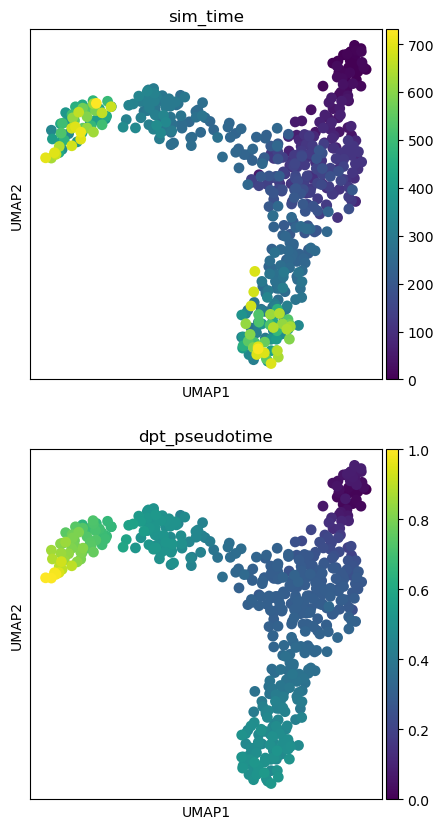

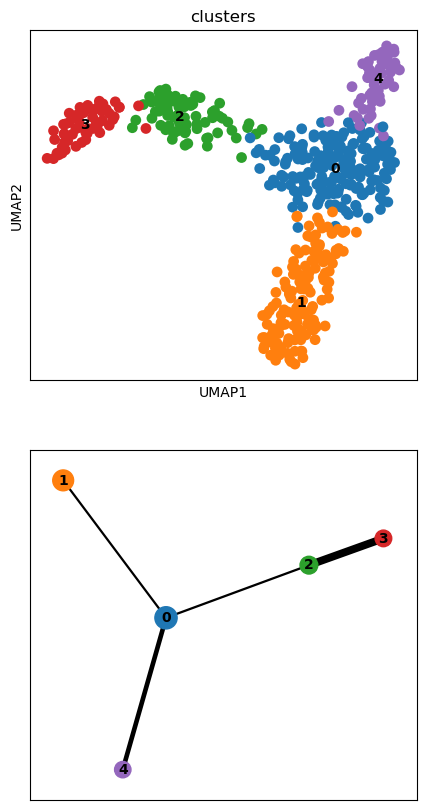

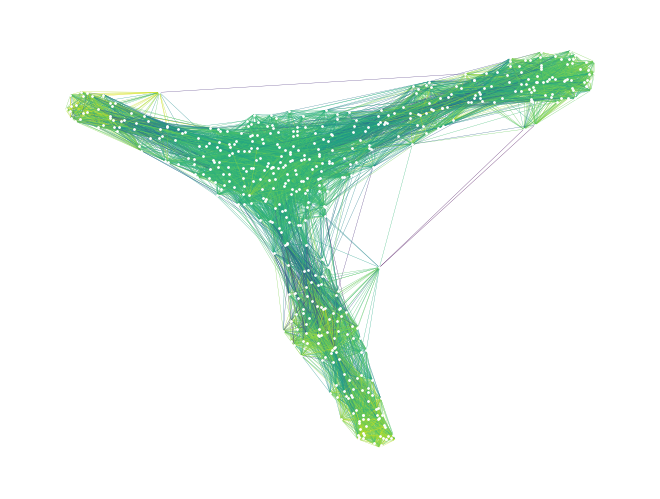

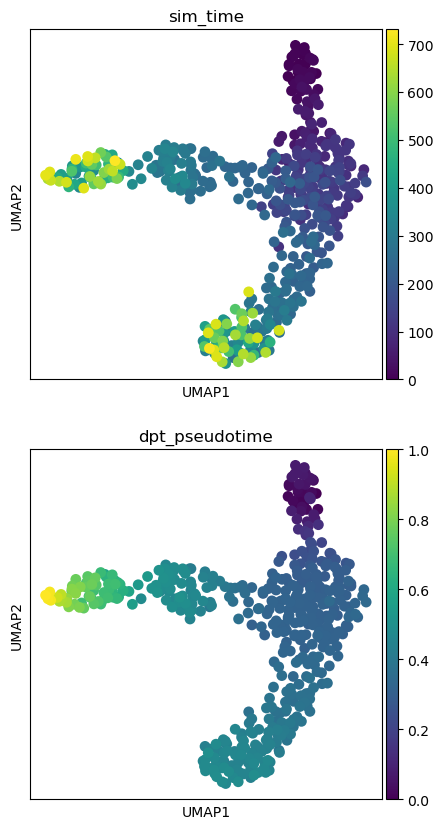

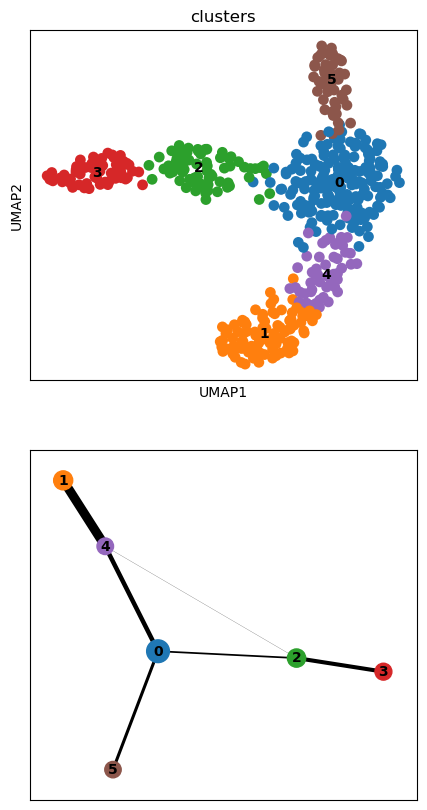

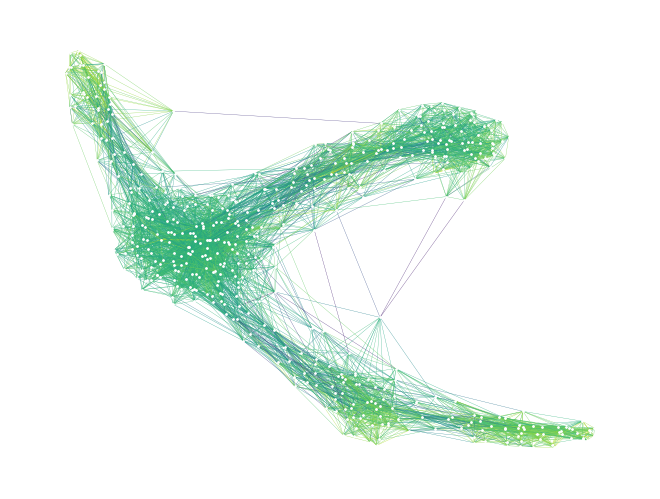

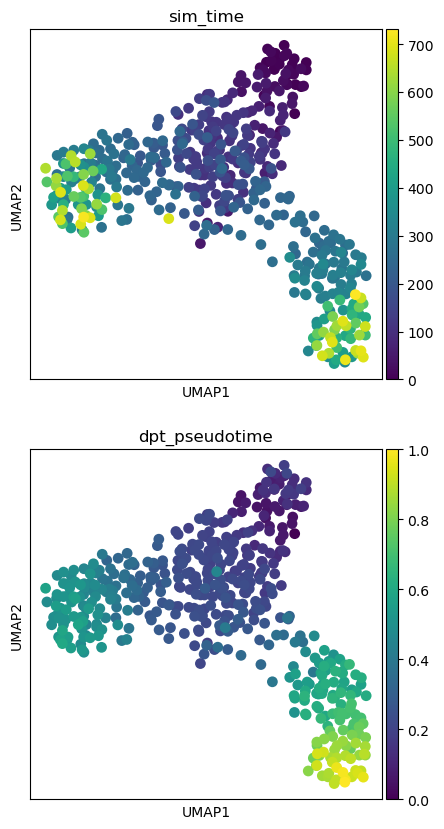

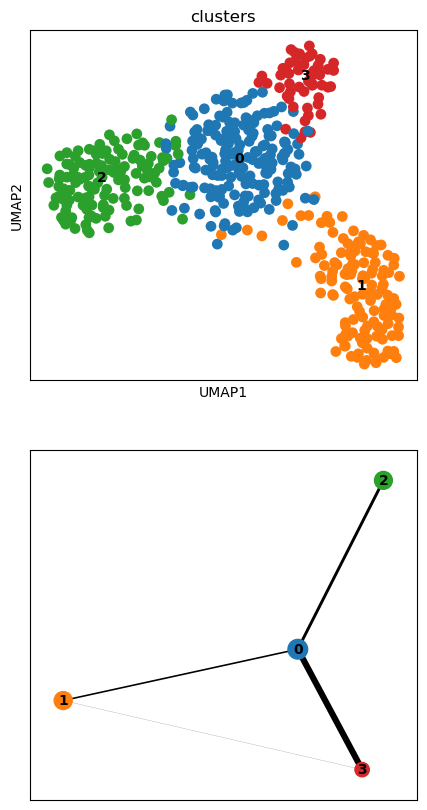

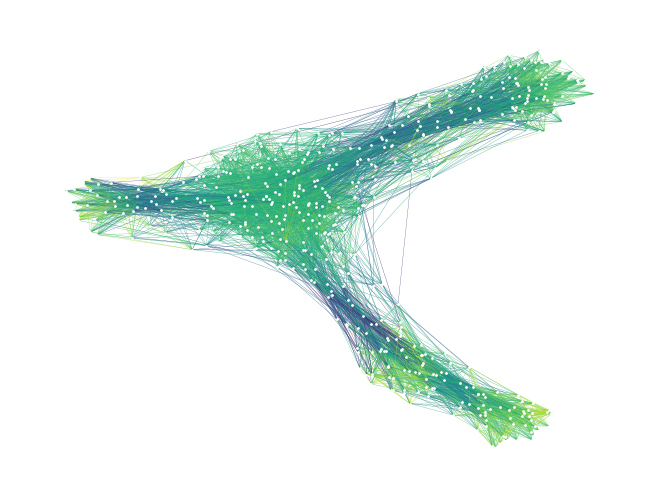

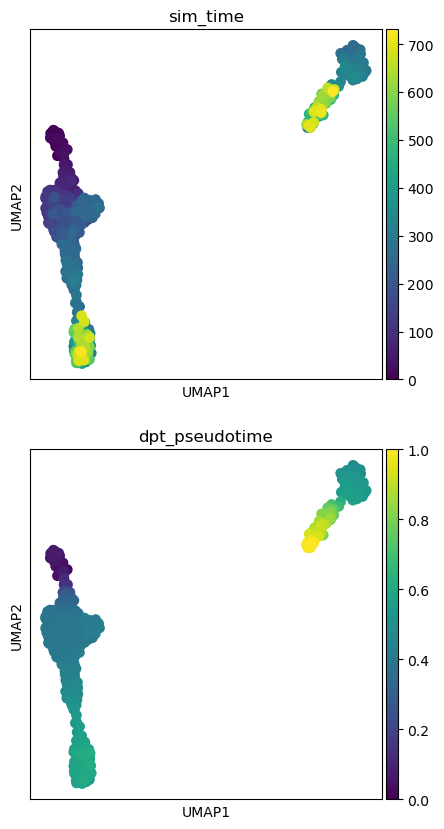

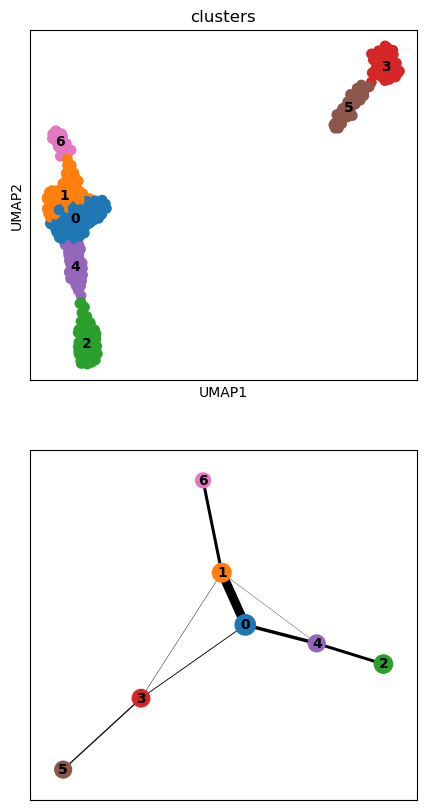

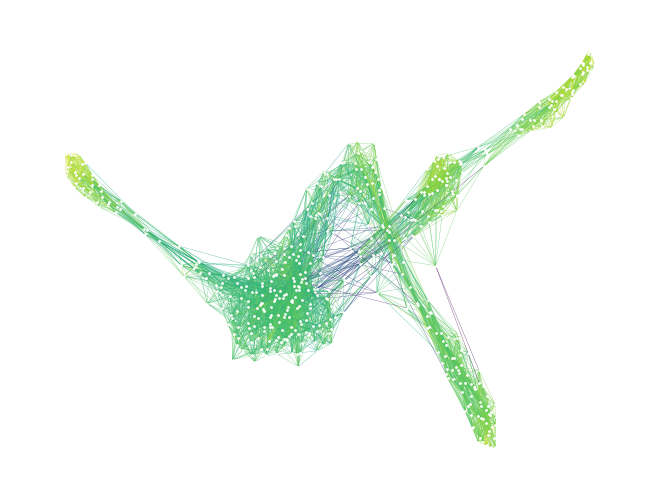

In [15]:
def plotPseudoTime(data):
    point_ad = data.copy()
    sc.tl.draw_graph(point_ad)
    sc.tl.louvain(adata=point_ad,key_added='clusters')
    root = np.argmin(point_ad.obs['sim_time'])
    point_ad.uns['iroot'] = root
    #sc.pp.neighbors(point_ad,n_neighbors=20)
    sc.tl.umap(point_ad)
    sc.tl.diffmap(point_ad)
    sc.tl.dpt(point_ad)
    fig_1,axs_1 = plt.subplots(2,1,figsize=(5,10))
    fig_2,axs_2 = plt.subplots(2,1,figsize=(5,10))
    sc.pl.umap(point_ad,color=["sim_time"],legend_loc="on data",ax=axs_1[0],show=False)
    sc.pl.umap(point_ad,color=["clusters"],legend_loc="on data",ax=axs_2[0],show=False)
    sc.pl.umap(point_ad,color=["dpt_pseudotime"],legend_loc="on data",ax=axs_1[1],show=False)
    sc.tl.paga(point_ad,groups='clusters')
    sc.pl.paga(point_ad,ax=axs_2[1],show=False)
    plt.show()
    return 
for ad in [big_knn_ad,small_knn_ad,min_trimed_ad,max_trimed_ad]:
    plotPseudoTime(ad)
    drawGraph(ad.obsp["distances"],ad.obsp["curvature"])